# NBA Salary Prediction
### Objective
Use NBA statistics to predict an NBA player's salary and use the residual to determine if a player was undervalued or overvalued that season

### Datasets Used:

Biometric, biographic and basic box score features from 1996 to 2020 season<br> 
https://www.kaggle.com/justinas/nba-players-data

NBA player salaries per season (2000 - 2021)<br> 
https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv

Every NBA team's regular season record (1946 - 2016)<br> 
https://data.world/gmoney/nba-team-records-by-year/workspace/file?filename=Historical+NBA+Performance.xlsx

Used to manually fill in team records from (2017 - 2020)<br> 
https://www.landofbasketball.com/nba_teams.htm

Basketball Players Stats per Season - 49 Leagues<br>
https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues


### Data
Based on the datasets I could find, I decided to use data between 2000 and 2020. I figured the last 20 years was good sample size since it had 2 generations of players, marked the end of the Chicago Bulls dynasty, and included all 30 teams for the most part (Charlotte Bobcats were added in 2004).

All of the data listed above was cleaned up and then imported into a Dataframe. Players who did not have their salary information were removed along with players who did not play for more than 10 games a season (teams can offer players 10-day contracts to assess their skill). Players that were traded mid-season were listed under their most recent team that year. For consistency, all data used the latter year to represent the seaon (ex: 2003-04 would be 2004).

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import seaborn as sns

### Features
This dataset was created as a second to reduce bias and focused more on raw data (cumulative for that season)

In [2]:
df = pd.read_csv('data/final/revised-nba-data.csv')
df

,Unnamed: 0,Season,Name,Team,GP,MIN,FGM,FGA,3PM,3PA,...,AST,STL,BLK,PTS,Pos,Salary,Age,W-L,W-L%,Cap%
0,0,2000,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,...,299,36,239,2344,C,17142000,28,67-15,0.817,0.504176
1,1,2000,Vince Carter,TOR,82,3126.0,788,1696,95,236,...,322,110,92,2107,G,2267000,23,45-37,0.549,0.066676
2,2,2000,Karl Malone,UTA,82,2947.0,752,1476,2,8,...,304,79,71,2095,PF,14000000,36,55-27,0.671,0.411765
3,3,2000,Allen Iverson,PHI,70,2853.0,729,1733,89,261,...,328,144,5,1989,SG,9000000,25,49-33,0.598,0.264706
4,4,2000,Gary Payton,SEA,82,3425.0,747,1666,177,520,...,732,153,18,1982,PG,11020000,31,45-37,0.549,0.324118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3903,2020,Anthony Tolliver,MEM,55,871.9,65,182,49,145,...,42,19,11,200,PF,183115,35,34-39,0.466,0.001678
3904,3904,2020,Rodney McGruder,LAC,56,870.9,72,181,24,89,...,36,26,8,187,SG,4807693,28,49-23,0.681,0.044051
3905,3905,2020,Goga Bitadze,IND,54,471.3,70,150,8,42,...,23,10,37,172,C,2816760,20,45-28,0.616,0.025809
3906,3906,2020,Nassir Little,POR,48,572.5,65,151,14,59,...,22,13,14,172,SF,2105520,20,35-39,0.473,0.019292


### NBA Salary Cap
The NBA salary cap is the limit to the total amount of money that NBA teams are allowed to pay their players. The graph below shows that the salary cap has increased over the years. Given this increase, we should adjust our player salary to the salary cap that season.

<AxesSubplot:title={'center':'NBA Salary Cap (2000 - 2020)'}, xlabel='Season'>

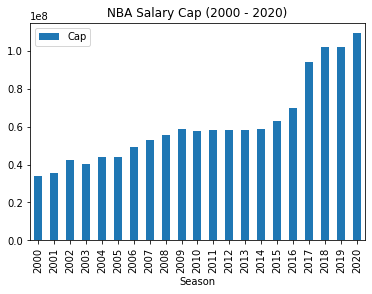

In [3]:
nba_salary_df = pd.read_csv('data/final/nba-salary-cap.csv')
nba_salary_df.ylim
nba_salary_df.plot(kind='bar', x='Season', y='Cap', title='NBA Salary Cap (2000 - 2020)')

## NBA Average Player Salary per Year
Despite the gradual increase in the salary cap, the graph below shows some irregularities. It's most likley that the majority of the early 2000's players in the data set were high-profile players. There are a few graphs online that show that the average salary gradually increased throughout the years similarly to the salry cap.
https://runrepeat.com/salary-analysis-in-the-nba-1991-2019

<AxesSubplot:title={'center':'NBA Player Salary (2000 - 2020)'}, xlabel='Season'>

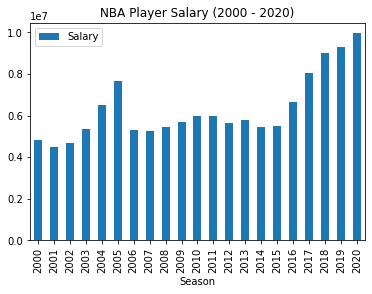

In [4]:
p_salary_df = df[['Season', 'Salary']]
p_salary_df = p_salary_df.groupby(['Season']).mean()
p_salary_df.plot(kind='bar', title='NBA Player Salary (2000 - 2020)')

If we count the number of entries per year we can that, as predicted, the early 2000's (00-05) entries are inconsistent in comparison to the following years.

<AxesSubplot:title={'center':'# of Entries per Year'}>

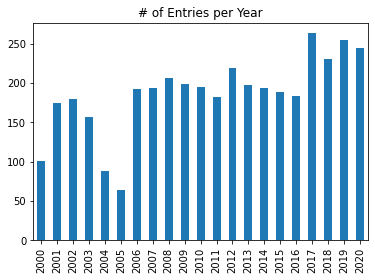

In [5]:
vc = df['Season'].value_counts().sort_index()
vc.plot.bar(title='# of Entries per Year')

## Salary & Statistics
We can use a heat map to explore the relationship between each category in our dataset. However, given the number of features it can be hard to tell which are relevant.

<AxesSubplot:>

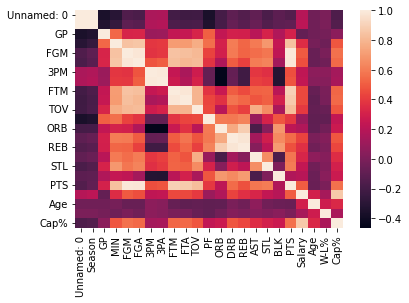

In [6]:
sns.heatmap(df.corr())

### Directly Correlated Features:
Height -> Weight

PTS -> TS%, USG%

AST -> AST%

REB -> DRB%, ORB%

GP -> GP%
### Categorical Feautres:
Season, TG

Season,Name,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,Pos,Salary,Age,W-L,W-L%,Cap%

In [7]:
# take a random sample of 250 to see the data more clearly in the pairplots
sample_df = df.sample(250)

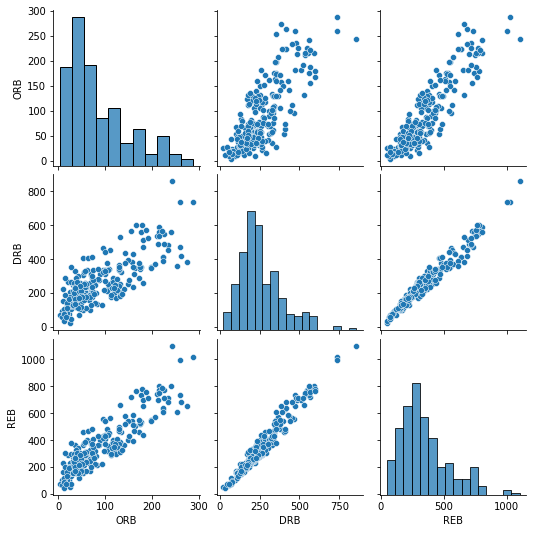

In [8]:
# example shwoing stats that are correlated
sns.pairplot(sample_df[['ORB', 'DRB', 'REB']])

We'll use a combination of raw data and some statistical on the basis that each is unique 

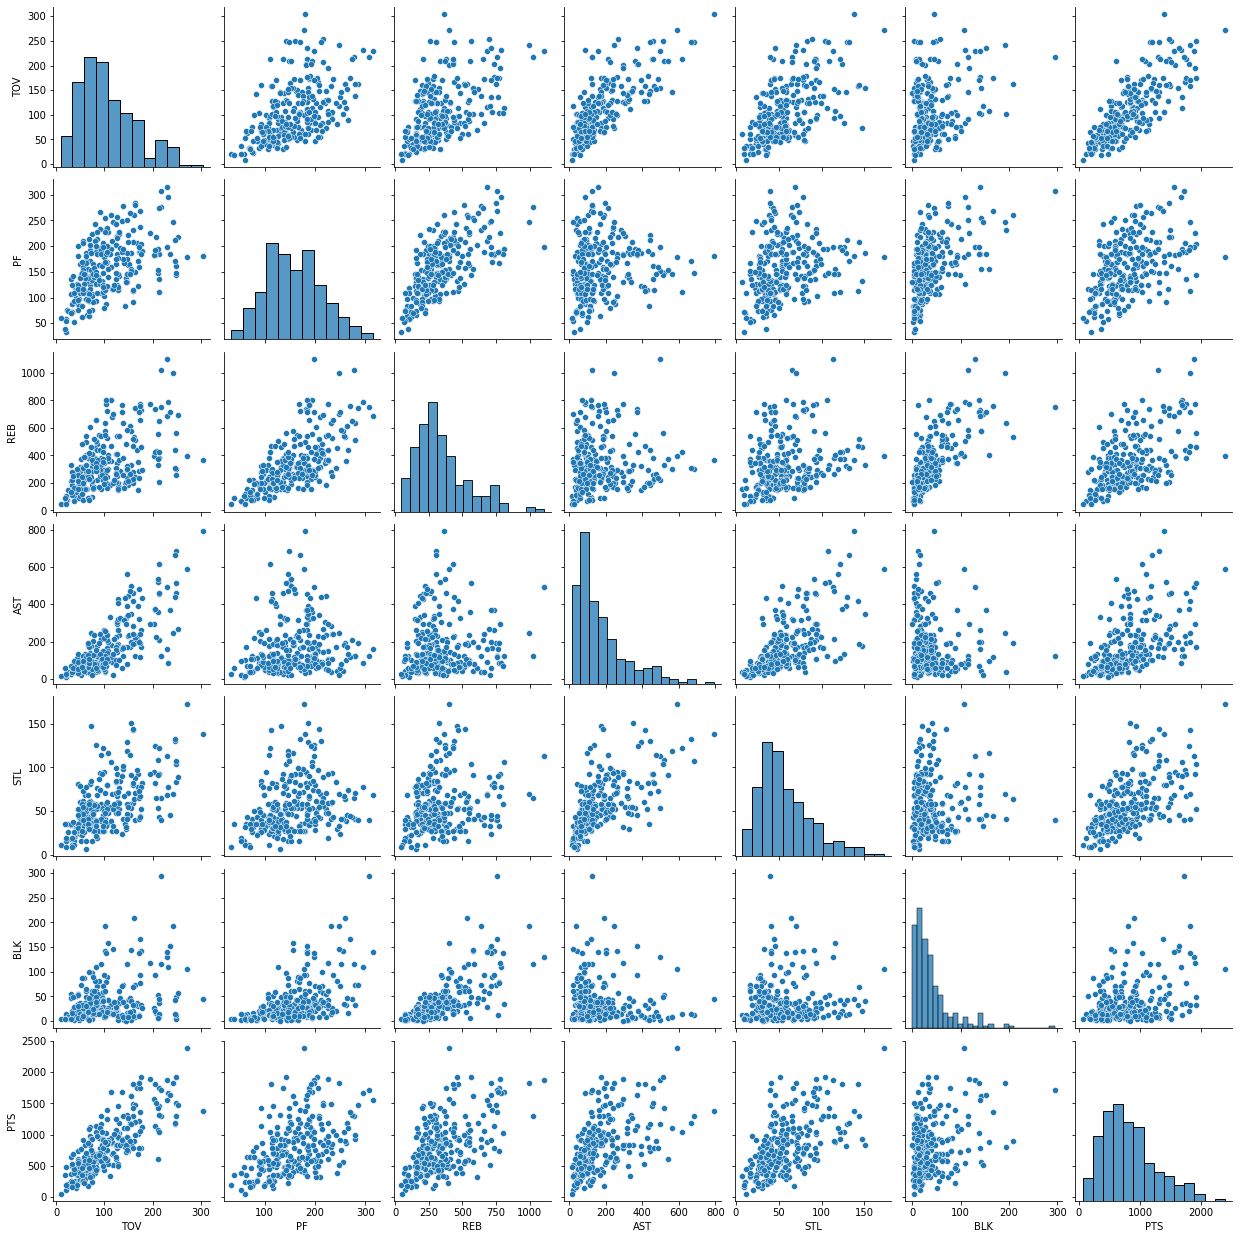

In [9]:
feat = ['TOV', 'PF', 'REB', 'AST', 'STL', 'BLK', 'PTS']
sns.pairplot(sample_df[feat])

## Training/Fitting Model
I decided to go with a Random Forest Regression because it had performed slightly better than Linear Regression. Note that one glaring problem with the result is the residual biased (seen in the 2nd graph)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [11]:
X = df[feat]
y = df[['Cap%']]

normalized_X = preprocessing.normalize(X)

model = RandomForestRegressor()
y_len = y.values.ravel().size
model.fit(X, np.ravel(y))
y_pred = model.predict(X)

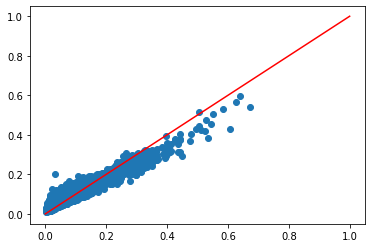

In [12]:
plt.scatter(y, y_pred.reshape(y_len,1))
plt.plot(np.array([0,1]), color='red')
plt.show()

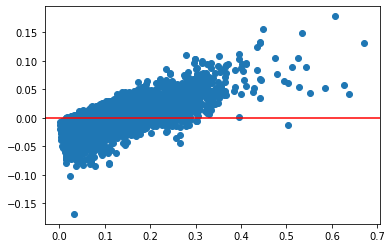

In [13]:
plt.scatter(y, y-y_pred.reshape(y_len,1))
plt.axhline(y=0, color='red')
plt.show()

In [14]:
df_pred = df
df_pred['Pred_Cap%'] = y_pred
df_pred['Residuals'] = df['Cap%'] -df['Pred_Cap%']
df_pred.to_csv('data/final/predicted-nba-data-revised.csv')
df_pred = df_pred[['Name', 'Team', 'Season', 'Salary', 'Age', 'GP' ,'PTS', 'AST', 'REB', 'Cap%', 'Pred_Cap%', 'Residuals']]
df_pred = df_pred.reindex(columns=['Name', 'Team', 'Season', 'Age', 'GP' ,'PTS', 'AST', 'REB', 'Salary', 'Cap%', 'Pred_Cap%', 'Residuals'])

df_pred['PTS'] = df_pred['PTS'].div(df_pred['GP']).round(1)
df_pred['AST'] = df_pred['AST'].div(df_pred['GP']).round(1)
df_pred['REB'] = df_pred['REB'].div(df_pred['GP']).round(1)

In [15]:
df_pred.sort_values(by='Residuals', ascending=False).head(15)

,Name,Team,Season,Age,GP,PTS,AST,REB,Salary,Cap%,Pred_Cap%,Residuals
623,Shaquille O'Neal,LAL,2004,32,67,21.5,2.9,11.5,26571000,0.606090,0.428045,0.178046
758,Dikembe Mutombo,HOU,2005,39,80,4.0,0.1,5.3,19684000,0.448689,0.293666,0.155024
571,Shawn Kemp,ORL,2003,33,79,6.8,0.7,5.7,21500000,0.533883,0.385774,0.148109
316,Juwan Howard,DEN,2002,29,81,14.6,2.1,7.6,18750000,0.441176,0.308948,0.132229
706,Shaquille O'Neal,MIA,2005,33,73,22.9,2.7,10.4,29464000,0.671621,0.539633,0.131987
28,Juwan Howard,WAS,2000,27,82,14.9,3.0,5.7,15000000,0.441176,0.310730,0.130446
38,Scottie Pippen,POR,2000,34,82,12.5,5.0,6.3,14795000,0.435147,0.311253,0.123894
188,Patrick Ewing,SEA,2001,38,79,9.6,1.2,7.4,14000000,0.394366,0.282366,0.112000
3803,Paul Millsap,DEN,2020,35,51,11.6,1.6,5.7,30350000,0.278083,0.167895,0.110188
59,Larry Johnson,NYK,2000,31,70,10.7,2.5,5.4,11910000,0.350294,0.242273,0.108022


In [16]:
df_pred.sort_values(by='Residuals', ascending=True).head(15)

,Name,Team,Season,Age,GP,PTS,AST,REB,Salary,Cap%,Pred_Cap%,Residuals
2926,Giannis Antetokounmpo,MIL,2017,22,80,22.9,5.4,8.8,2995421,0.031818,0.200397,-0.168579
3465,John Collins,ATL,2019,21,61,19.5,2.0,9.8,2299080,0.022569,0.124617,-0.102048
478,Pau Gasol,MEM,2003,22,82,19.0,2.8,8.8,3194000,0.079313,0.164006,-0.084694
3684,Shai Gilgeous-Alexander,OKC,2020,21,70,19.0,3.3,5.9,3952920,0.036219,0.120134,-0.083916
1362,Brandon Roy,POR,2009,24,78,22.6,5.1,4.7,3084240,0.052560,0.135302,-0.082741
1162,Dwight Howard,ORL,2008,22,82,20.7,1.3,14.2,6061274,0.108957,0.190570,-0.081613
2157,Stephen Curry,GSW,2013,25,78,22.9,6.9,4.0,3958742,0.068202,0.149454,-0.081252
3448,Pascal Siakam,TOR,2019,25,80,16.9,3.1,6.9,1544951,0.015166,0.095213,-0.080046
957,LeBron James,CLE,2007,22,78,27.3,6.0,6.7,5828089,0.109685,0.188353,-0.078669
974,Luol Deng,CHI,2007,22,82,18.8,2.5,7.1,2614440,0.049204,0.127678,-0.078474


In [17]:
df_pred.sort_values(by='Cap%', ascending=False).head(5)

,Name,Team,Season,Age,GP,PTS,AST,REB,Salary,Cap%,Pred_Cap%,Residuals
706,Shaquille O'Neal,MIA,2005,33,73,22.9,2.7,10.4,29464000,0.671621,0.539633,0.131987
612,Kevin Garnett,MIN,2004,28,82,24.2,5.0,13.9,28000000,0.638686,0.596302,0.042384
461,Kevin Garnett,MIN,2003,27,82,23.0,6.0,13.4,25200000,0.625760,0.567596,0.058164
623,Shaquille O'Neal,LAL,2004,32,67,21.5,2.9,11.5,26571000,0.606090,0.428045,0.178046
463,Shaquille O'Neal,LAL,2003,31,67,27.5,3.1,11.1,23571000,0.585310,0.532657,0.052653


<AxesSubplot:title={'center':'# of Entries per Year'}>

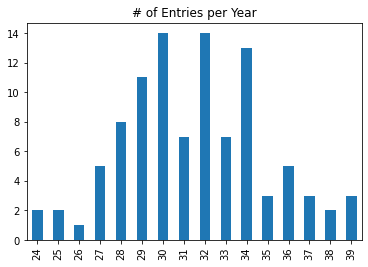

In [20]:
temp = df_pred.sort_values(by='Residuals', ascending=False)['Age'].head(100).value_counts().sort_index()
temp.plot.bar(title='# of Entries per Year')

<AxesSubplot:title={'center':'# of Entries per Year'}>

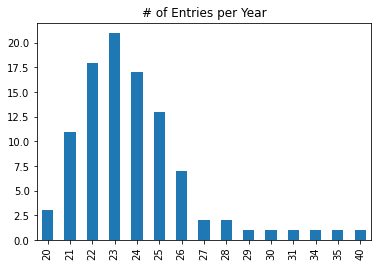

In [21]:
temp = df_pred.sort_values(by='Residuals', ascending=True)['Age'].head(100).value_counts().sort_index()
temp.plot.bar(title='# of Entries per Year')